# **1. Perkenalan Dataset**


**Sumber Dataset** <br>
Sumber dataset yang digunakan: Kaggle <br>
Dataset: Bank Transaction Dataset for Fraud Detection <br>
Link dataset: https://www.kaggle.com/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection


# **2. Import Library**

Library yang digunakan untuk melakukan analisis data dan pembangunan Machine Learning

In [1880]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

# **3. Memuat Dataset**

In [1881]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("valakhorasani/bank-transaction-dataset-for-fraud-detection")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4


In [1882]:
import os
path = "/root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4"
files = os.listdir(path)
print(files)

['bank_transactions_data_2.csv']


In [1883]:
df = "/root/.cache/kagglehub/datasets/valakhorasani/bank-transaction-dataset-for-fraud-detection/versions/4/bank_transactions_data_2.csv"
# sesuaikan dengan path atau lokasi file

df_ori = pd.read_csv(df)

In [1884]:
df_ori.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


In [1885]:
df = df_ori.copy()

In [1886]:
df.drop(['TransactionID', 'AccountID', 'DeviceID', 'IP Address', 'MerchantID'], axis=1, inplace=True)

In [1887]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


Kolom yang bersifat ID atau kode unik tidak digunakan dalam clustering karena tidak memberikan informasi yang berguna untuk mengelompokkan data.

### - Meninjau Struktur Data

In [1888]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionAmount        2512 non-null   float64
 1   TransactionDate          2512 non-null   object 
 2   TransactionType          2512 non-null   object 
 3   Location                 2512 non-null   object 
 4   Channel                  2512 non-null   object 
 5   CustomerAge              2512 non-null   int64  
 6   CustomerOccupation       2512 non-null   object 
 7   TransactionDuration      2512 non-null   int64  
 8   LoginAttempts            2512 non-null   int64  
 9   AccountBalance           2512 non-null   float64
 10  PreviousTransactionDate  2512 non-null   object 
dtypes: float64(2), int64(3), object(6)
memory usage: 216.0+ KB


In [1889]:
df.shape

(2512, 11)

In [1890]:
df.describe(include='all')

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
count,2512.000000,2512,2512,2512,2512,2512.000000,2512,2512.000000,2512.000000,2512.000000,2512
unique,NaN,2512,2,43,3,NaN,4,NaN,NaN,NaN,360
top,NaN,2023-04-03 16:07:53,Debit,Fort Worth,Branch,NaN,Student,NaN,NaN,NaN,2024-11-04 08:09:17
freq,NaN,1,1944,70,868,NaN,657,NaN,NaN,NaN,16
mean,297.593778,NaN,NaN,NaN,NaN,44.673965,NaN,119.643312,1.124602,5114.302966,NaN
std,291.946243,NaN,NaN,NaN,NaN,17.792198,NaN,69.963757,0.602662,3900.942499,NaN
min,0.260000,NaN,NaN,NaN,NaN,18.000000,NaN,10.000000,1.000000,101.250000,NaN
25%,81.885000,NaN,NaN,NaN,NaN,27.000000,NaN,63.000000,1.000000,1504.370000,NaN
50%,211.140000,NaN,NaN,NaN,NaN,45.000000,NaN,112.500000,1.000000,4735.510000,NaN
75%,414.527500,NaN,NaN,NaN,NaN,59.000000,NaN,161.000000,1.000000,7678.820000,NaN


### - Meninjau Missing Value dan Duplikasi Data

In [1891]:
df.duplicated().sum()

np.int64(0)

In [1892]:
df.isnull().sum()

,0
TransactionAmount,0
TransactionDate,0
TransactionType,0
Location,0
Channel,0
CustomerAge,0
CustomerOccupation,0
TransactionDuration,0
LoginAttempts,0
AccountBalance,0


Pada data tersebut tidak terdapat data yang kosong *(null)* atau duplikasi data

### - Analisa Distribusi dan Korelasi

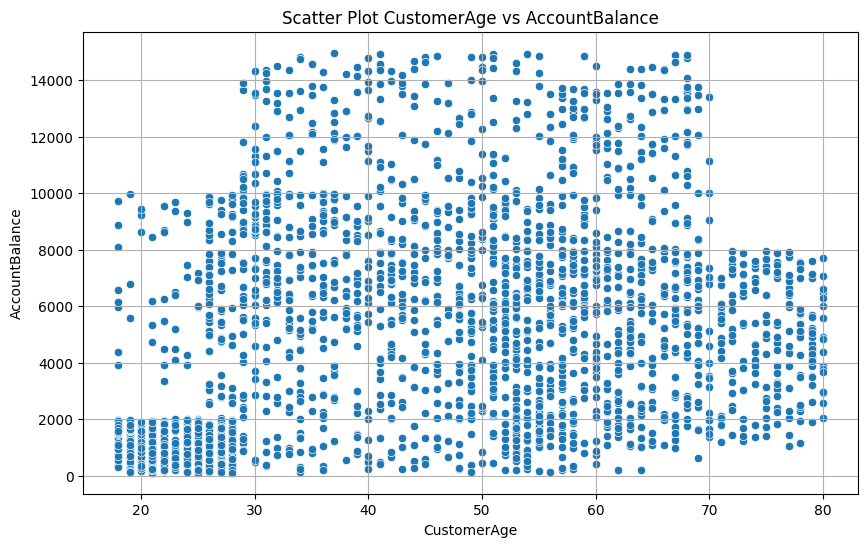

In [1893]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CustomerAge'], y=df['AccountBalance'])

plt.title('Scatter Plot CustomerAge vs AccountBalance')
plt.xlabel('CustomerAge')
plt.ylabel('AccountBalance')
plt.grid(True)
plt.show()

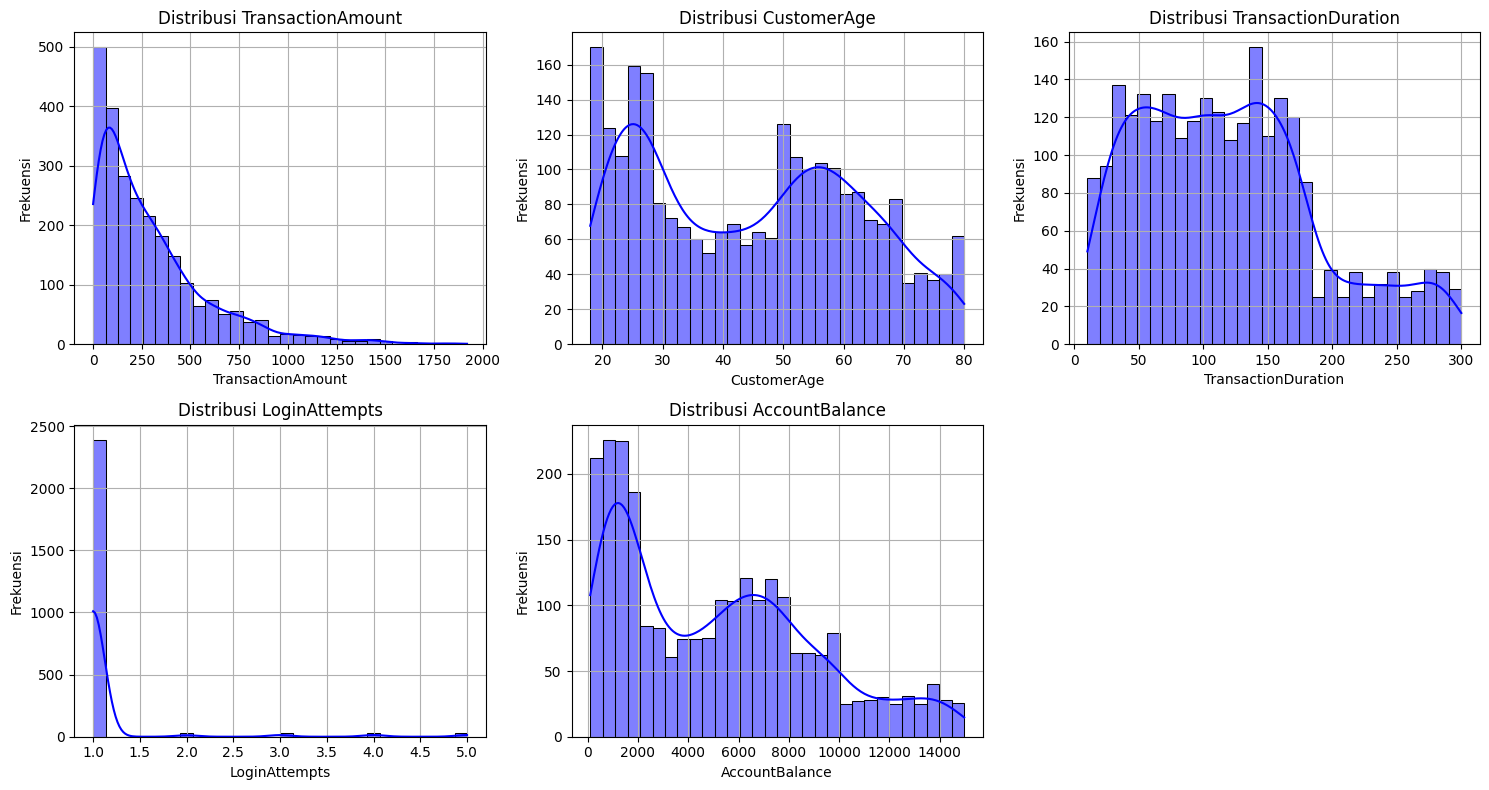

In [1894]:
num_col = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']

plt.figure(figsize=(15, 8))

for i, col in enumerate(num_col, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.grid(True)

plt.tight_layout()
plt.show()

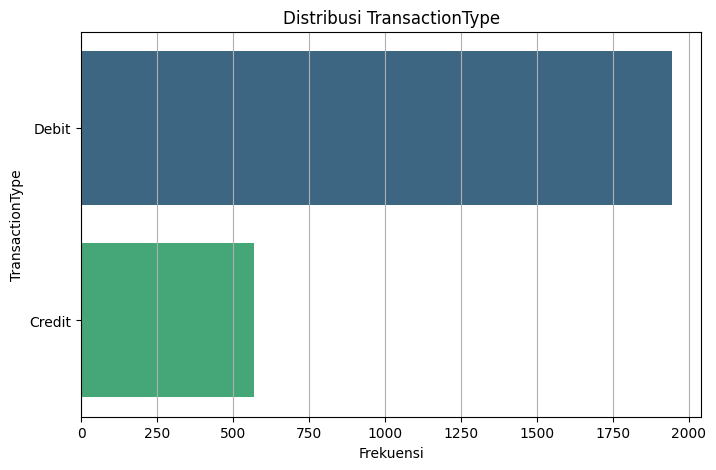

In [1895]:
plt.figure(figsize=(8, 5))
sns.countplot(y=df['TransactionType'], hue=df['TransactionType'], palette='viridis', legend=False)

plt.title('Distribusi TransactionType')
plt.ylabel('TransactionType')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

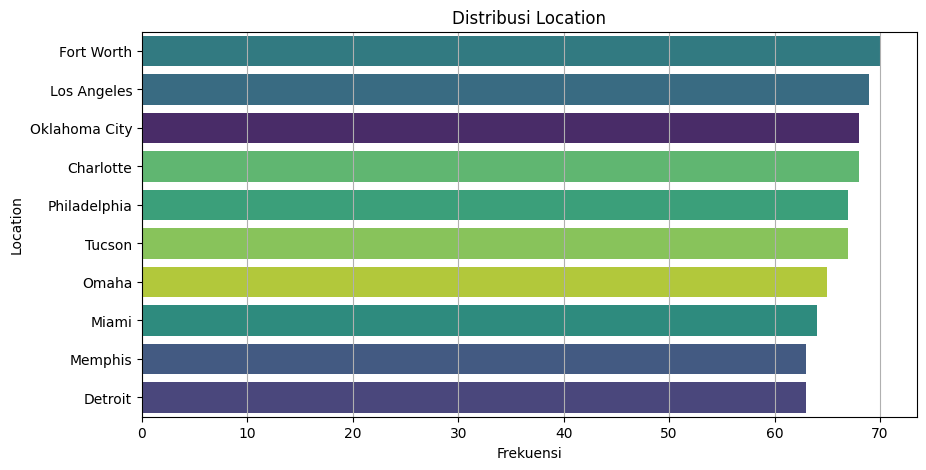

In [1896]:
top_10_locations = df['Location'].value_counts().nlargest(10).index
df_top_10 = df[df['Location'].isin(top_10_locations)]

plt.figure(figsize=(10, 5))

sns.countplot(y=df_top_10['Location'], order=top_10_locations, palette='viridis', hue=df_top_10['Location'], legend=False)


plt.title('Distribusi Location')
plt.ylabel('Location')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

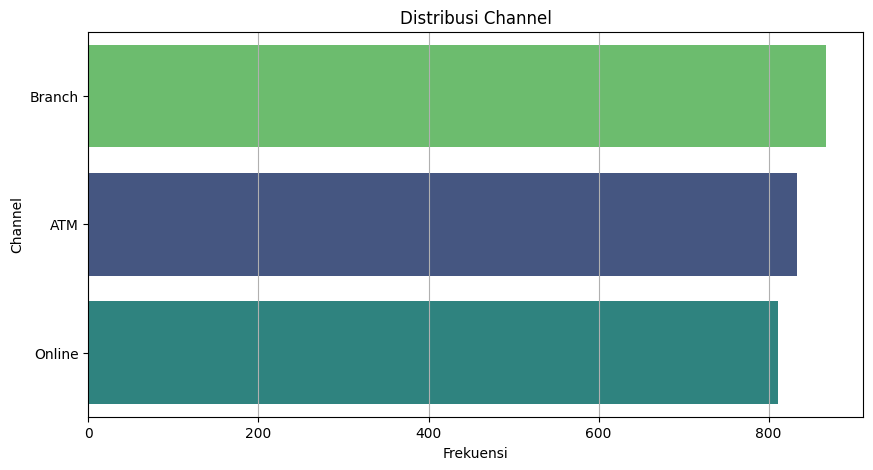

In [1897]:
plt.figure(figsize=(10, 5))
channel_order = df['Channel'].value_counts().index
sns.countplot(y=df['Channel'], hue=df['Channel'], order=channel_order, palette='viridis', legend=False)

plt.title('Distribusi Channel')
plt.ylabel('Channel')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

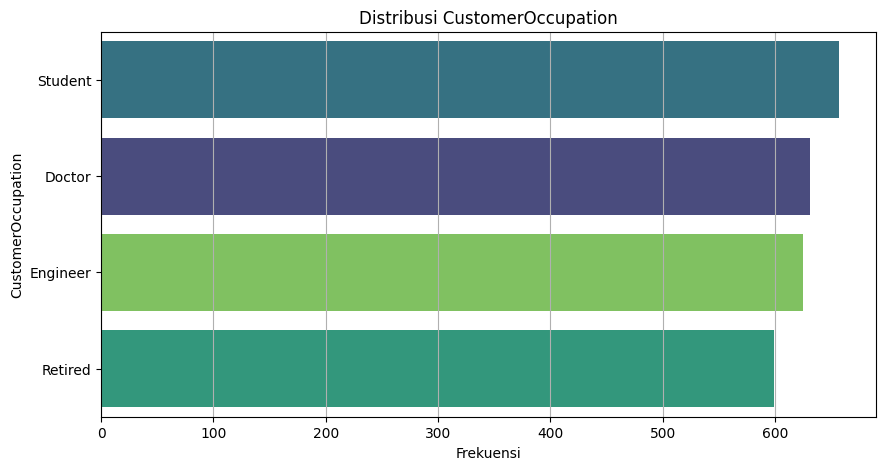

In [1898]:
plt.figure(figsize=(10, 5))

occupation_order = df['CustomerOccupation'].value_counts().index

sns.countplot(y=df['CustomerOccupation'], hue=df['CustomerOccupation'], order=occupation_order, palette='viridis', legend=False)

plt.title('Distribusi CustomerOccupation')
plt.ylabel('CustomerOccupation')
plt.xlabel('Frekuensi')
plt.grid(True, axis='x')
plt.show()

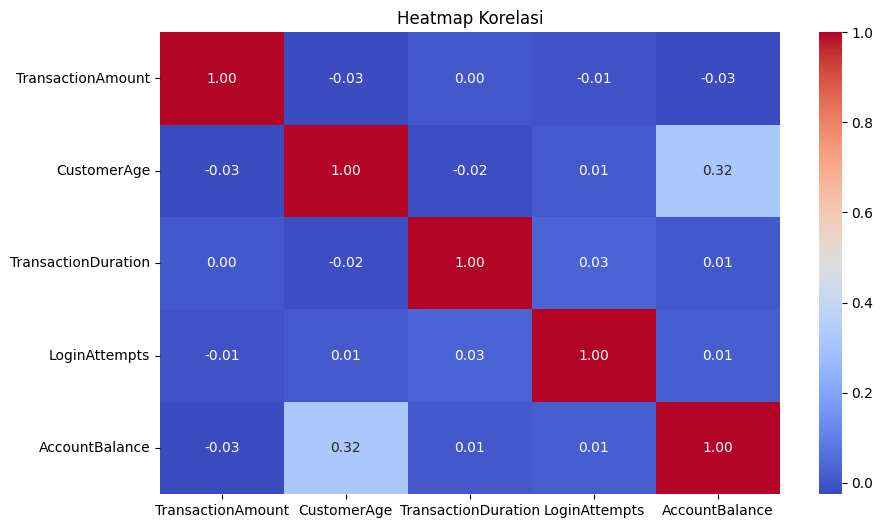

In [1899]:
numeric_columns = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']
plt.figure(figsize=(10, 6))
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi")
plt.show()

# **5. Data Preprocessing**

Dataset yang digunakan tidak memiliki missing values dan data duplikat

In [1900]:
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2512.000000,2512.000000,2512.000000,2512.000000,2512.000000
mean,297.593778,44.673965,119.643312,1.124602,5114.302966
std,291.946243,17.792198,69.963757,0.602662,3900.942499
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.885000,27.000000,63.000000,1.000000,1504.370000
50%,211.140000,45.000000,112.500000,1.000000,4735.510000
75%,414.527500,59.000000,161.000000,1.000000,7678.820000
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


In [1901]:
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,14.09,2023-04-11 16:29:14,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08
1,376.24,2023-06-27 16:44:19,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35
2,126.29,2023-07-10 18:16:08,Debit,Mesa,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39


### - Normalisasi dan Standarisasi

In [1902]:
# Konversi kolom ke format datetime
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['PreviousTransactionDate'] = pd.to_datetime(df['PreviousTransactionDate'])

# Ekstraksi fitur waktu
df['TransactionYear'] = df['TransactionDate'].dt.year
df['TransactionMonth'] = df['TransactionDate'].dt.month
df['TransactionDay'] = df['TransactionDate'].dt.day
df['TransactionHour'] = df['TransactionDate'].dt.hour
df['TransactionWeekday'] = df['TransactionDate'].dt.weekday

df['DaysSinceLastTransaction'] = (df['TransactionDate'] - df['PreviousTransactionDate']).dt.days.abs()

print(df[['TransactionYear', 'TransactionMonth', 'TransactionDay', 'TransactionHour', 'TransactionWeekday', 'DaysSinceLastTransaction']].head())

   TransactionYear  TransactionMonth  TransactionDay  TransactionHour  \
0             2023                 4              11               16   
1             2023                 6              27               16   
2             2023                 7              10               18   
3             2023                 5               5               16   
4             2023                10              16               17   

   TransactionWeekday  DaysSinceLastTransaction  
0                   1                       573  
1                   1                       496  
2                   0                       483  
3                   4                       549  
4                   0                       385  


In [1903]:
df.drop(columns=['TransactionDate', 'PreviousTransactionDate'], inplace=True)

### - Meninjau Outlier

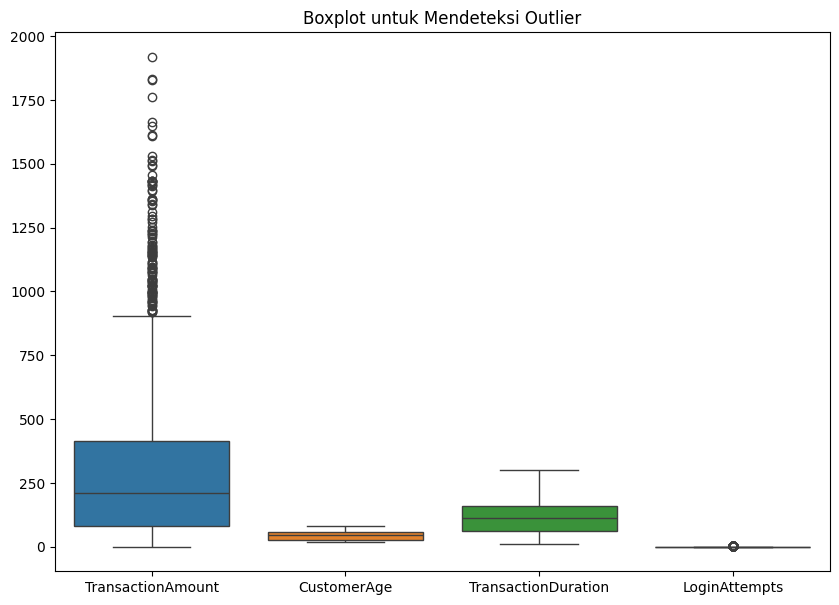

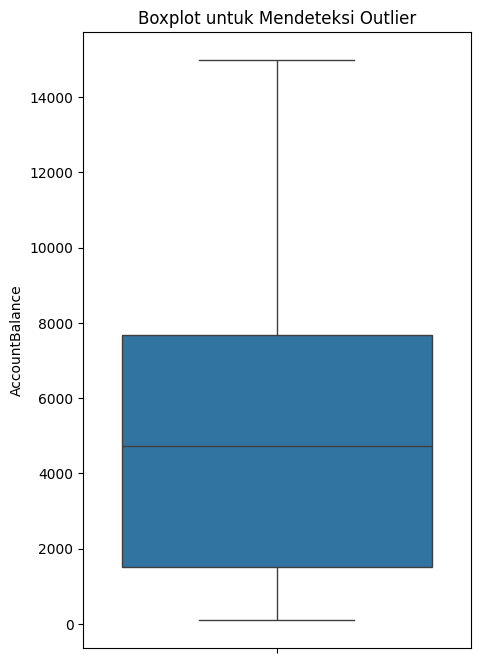

In [1904]:
kolom_numerik = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts']

plt.figure(figsize=(10, 7))
sns.boxplot(data=df[kolom_numerik])
#plt.xticks(rotation=45)
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

plt.figure(figsize=(5, 8))
sns.boxplot(data=df['AccountBalance'])
plt.title('Boxplot untuk Mendeteksi Outlier')
plt.show()

Outlier tidak dihapus karena bisa menjadi cluster tersendiri dan K-Means dapat menangani ini dengan baik

### - Encoding

In [1905]:
df.head()

,TransactionAmount,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionWeekday,DaysSinceLastTransaction
0,14.09,Debit,San Diego,ATM,70,Doctor,81,1,5112.21,2023,4,11,16,1,573
1,376.24,Debit,Houston,ATM,68,Doctor,141,1,13758.91,2023,6,27,16,1,496
2,126.29,Debit,Mesa,Online,19,Student,56,1,1122.35,2023,7,10,18,0,483
3,184.50,Debit,Raleigh,Online,26,Student,25,1,8569.06,2023,5,5,16,4,549
4,13.45,Credit,Atlanta,Online,26,Student,198,1,7429.40,2023,10,16,17,0,385


In [1906]:
df['Channel'].nunique()

3

In [1907]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['TransactionType'] = le.fit_transform(df['TransactionType'])

In [1908]:
df['Location_Freq'] = df['Location'].map(df['Location'].value_counts() / len(df))
df.drop(columns=['Location'], inplace=True)

In [1909]:
df = pd.get_dummies(df, columns=['Channel'], drop_first=True)

In [1910]:
df = pd.get_dummies(df, columns=['CustomerOccupation'], drop_first=True)

In [1911]:
df.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionWeekday,DaysSinceLastTransaction,Location_Freq,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,14.09,1,70,81,1,5112.21,2023,4,11,16,1,573,0.023487,False,False,False,False,False
1,376.24,1,68,141,1,13758.91,2023,6,27,16,1,496,0.025080,False,False,False,False,False
2,126.29,1,19,56,1,1122.35,2023,7,10,18,0,483,0.024283,False,True,False,False,True
3,184.50,1,26,25,1,8569.06,2023,5,5,16,4,549,0.023487,False,True,False,False,True
4,13.45,0,26,198,1,7429.40,2023,10,16,17,0,385,0.024283,False,True,False,False,True


In [1912]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TransactionAmount            2512 non-null   float64
 1   TransactionType              2512 non-null   int64  
 2   CustomerAge                  2512 non-null   int64  
 3   TransactionDuration          2512 non-null   int64  
 4   LoginAttempts                2512 non-null   int64  
 5   AccountBalance               2512 non-null   float64
 6   TransactionYear              2512 non-null   int32  
 7   TransactionMonth             2512 non-null   int32  
 8   TransactionDay               2512 non-null   int32  
 9   TransactionHour              2512 non-null   int32  
 10  TransactionWeekday           2512 non-null   int32  
 11  DaysSinceLastTransaction     2512 non-null   int64  
 12  Location_Freq                2512 non-null   float64
 13  Channel_Branch    

### - Binning

In [1913]:
bins = [0, 500, 1000, 1500, np.inf]
labels = ['Low', 'Medium', 'High', 'Very High']
df['TransactionAmount_Bin'] = pd.cut(df['TransactionAmount'], bins=bins, labels=labels)

In [1914]:
bins = [0, 18, 30, 45, 60, 100]  # Rentang usia
labels = ['Teenager', 'Young Adult', 'Adult', 'Middle Age', 'Senior']
df['CustomerAge_Bin'] = pd.cut(df['CustomerAge'], bins=bins, labels=labels)

In [1915]:
df['TransactionDuration_Bin'] = pd.cut(df['TransactionDuration'], bins=3, labels=['Short', 'Medium', 'Long'])


In [1916]:
bins = [0, 7, 30, 90, 180, 365, np.inf]
labels = ['<1 Week', '1 Week - 1 Month', '1-3 Months', '3-6 Months', '6-12 Months', '1+ Year']
df['DaysSinceLastTransaction_Bin'] = pd.cut(df['DaysSinceLastTransaction'], bins=bins, labels=labels)


In [1917]:
df.drop(columns=['TransactionAmount_Bin','CustomerAge_Bin' ,'TransactionDuration_Bin' ,'DaysSinceLastTransaction_Bin'], inplace=True)

scaler = StandardScaler()
df_scaled_array = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled_array, columns=df.columns)

In [1918]:
features = ['TransactionType','TransactionAmount','CustomerAge', 'AccountBalance',
            'CustomerOccupation_Engineer', 'CustomerOccupation_Retired', 'CustomerOccupation_Student', 'TransactionType', 'DaysSinceLastTransaction' ]

scaler = StandardScaler()
df_scaled_selection = scaler.fit_transform(df[features])

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Model yang digunakan: K-Means

In [1919]:
df_scaled.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionWeekday,DaysSinceLastTransaction,Location_Freq,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student
0,-0.971275,0.540538,1.423718,-0.552443,-0.206794,-0.000537,-0.072125,-0.737432,-0.551082,-0.856729,-0.296655,0.800526,-0.028446,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128
1,0.269440,0.540538,1.311287,0.305314,-0.206794,2.216472,-0.072125,-0.161875,1.275496,-0.856729,-0.296655,0.076554,0.598373,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128
2,-0.586882,0.540538,-1.443277,-0.909842,-0.206794,-1.023534,-0.072125,0.125903,-0.665243,1.879574,-0.958464,-0.045675,0.284963,-0.726623,1.448244,-0.575512,-0.559572,1.680309
3,-0.387456,0.540538,-1.049768,-1.353017,-0.206794,0.885797,-0.072125,-0.449653,-1.236049,-0.856729,1.688773,0.574872,-0.028446,-0.726623,1.448244,-0.575512,-0.559572,1.680309
4,-0.973468,-1.850010,-1.049768,1.120184,-0.206794,0.593589,-0.072125,0.989238,0.019724,0.511423,-0.958464,-0.967094,0.284963,-0.726623,1.448244,-0.575512,-0.559572,1.680309


In [1920]:
inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, labels))

## **b. Evaluasi Model Clustering**

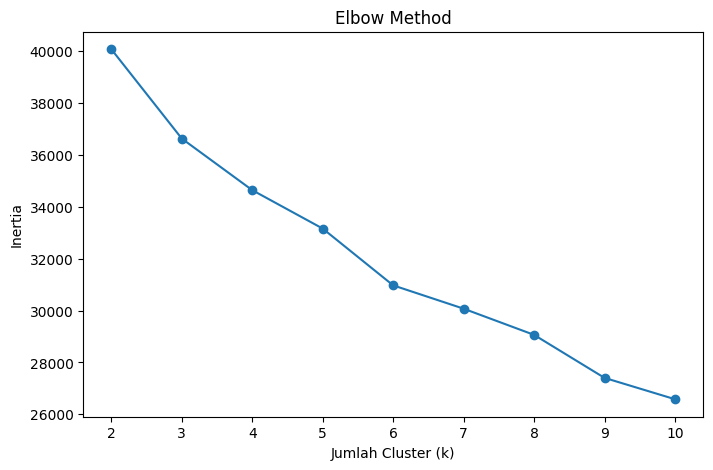

In [1921]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

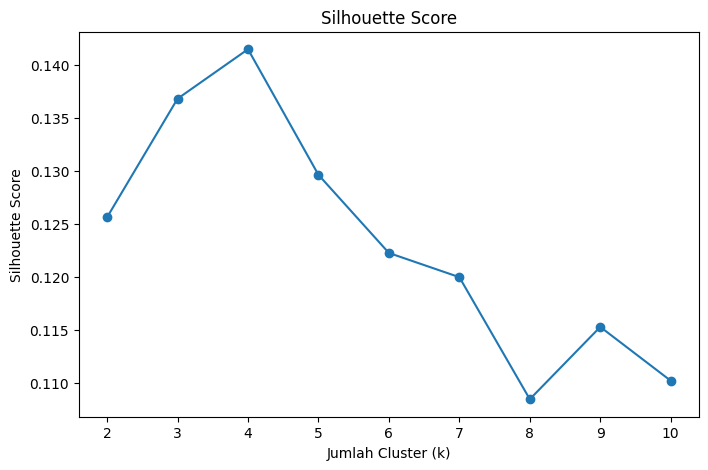

In [1922]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [1923]:
# Cetak silhouette score untuk setiap jumlah cluster
for k, score in zip(k_values, silhouette_scores):
    print(f'Jumlah Cluster: {k}, Silhouette Score: {score}')


Jumlah Cluster: 2, Silhouette Score: 0.1256092091577069
Jumlah Cluster: 3, Silhouette Score: 0.13678521491233342
Jumlah Cluster: 4, Silhouette Score: 0.14145282223492847
Jumlah Cluster: 5, Silhouette Score: 0.12961065341538777
Jumlah Cluster: 6, Silhouette Score: 0.12224424329104411
Jumlah Cluster: 7, Silhouette Score: 0.11996211823237767
Jumlah Cluster: 8, Silhouette Score: 0.10845549742079014
Jumlah Cluster: 9, Silhouette Score: 0.11527220352775608
Jumlah Cluster: 10, Silhouette Score: 0.1101985682649407


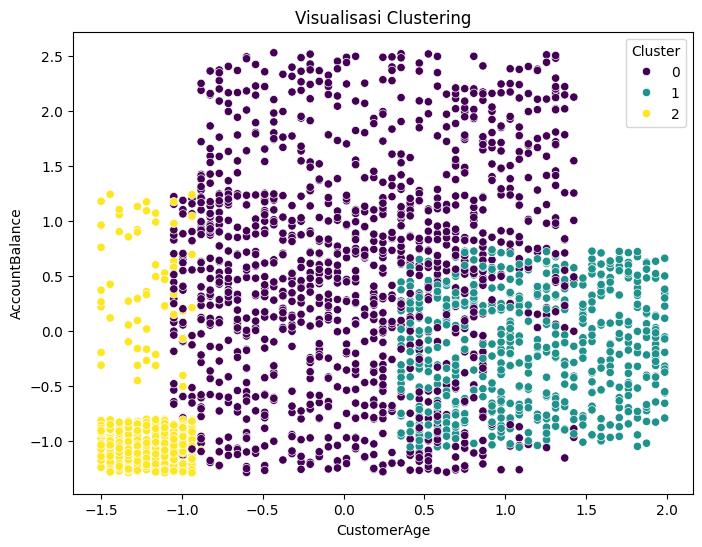

Cluster
0    1255
2     658
1     599
Name: count, dtype: int64


In [1924]:
k_optimal = 3
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_scaled['CustomerAge'], y=df_scaled['AccountBalance'], hue=df_scaled['Cluster'], palette='viridis')
plt.xlabel('CustomerAge')
plt.ylabel('AccountBalance')
plt.title('Visualisasi Clustering')
plt.show()

print(df_scaled['Cluster'].value_counts())

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [1925]:
df_scaled.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,TransactionYear,TransactionMonth,TransactionDay,TransactionHour,TransactionWeekday,DaysSinceLastTransaction,Location_Freq,Channel_Branch,Channel_Online,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,Cluster
0,-0.971275,0.540538,1.423718,-0.552443,-0.206794,-0.000537,-0.072125,-0.737432,-0.551082,-0.856729,-0.296655,0.800526,-0.028446,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128,0
1,0.269440,0.540538,1.311287,0.305314,-0.206794,2.216472,-0.072125,-0.161875,1.275496,-0.856729,-0.296655,0.076554,0.598373,-0.726623,-0.690491,-0.575512,-0.559572,-0.595128,0
2,-0.586882,0.540538,-1.443277,-0.909842,-0.206794,-1.023534,-0.072125,0.125903,-0.665243,1.879574,-0.958464,-0.045675,0.284963,-0.726623,1.448244,-0.575512,-0.559572,1.680309,2
3,-0.387456,0.540538,-1.049768,-1.353017,-0.206794,0.885797,-0.072125,-0.449653,-1.236049,-0.856729,1.688773,0.574872,-0.028446,-0.726623,1.448244,-0.575512,-0.559572,1.680309,2
4,-0.973468,-1.850010,-1.049768,1.120184,-0.206794,0.593589,-0.072125,0.989238,0.019724,0.511423,-0.958464,-0.967094,0.284963,-0.726623,1.448244,-0.575512,-0.559572,1.680309,2


In [1926]:
df_scaled = pd.DataFrame(df_scaled_selection, columns=features)

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled.drop(columns=['Cluster'], errors='ignore'))

# Konversi ke DataFrame
df_pca = pd.DataFrame(df_pca, columns=['PC1', 'PC2'])

inertia = []
silhouette_scores = []
k_values = range(2, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_pca)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_pca, labels))

In [1927]:
df_scaled.head()

,TransactionType,TransactionAmount,CustomerAge,AccountBalance,CustomerOccupation_Engineer,CustomerOccupation_Retired,CustomerOccupation_Student,TransactionType,DaysSinceLastTransaction
0,0.540538,-0.971275,1.423718,-0.000537,-0.575512,-0.559572,-0.595128,0.540538,0.800526
1,0.540538,0.269440,1.311287,2.216472,-0.575512,-0.559572,-0.595128,0.540538,0.076554
2,0.540538,-0.586882,-1.443277,-1.023534,-0.575512,-0.559572,1.680309,0.540538,-0.045675
3,0.540538,-0.387456,-1.049768,0.885797,-0.575512,-0.559572,1.680309,0.540538,0.574872
4,-1.850010,-0.973468,-1.049768,0.593589,-0.575512,-0.559572,1.680309,-1.850010,-0.967094


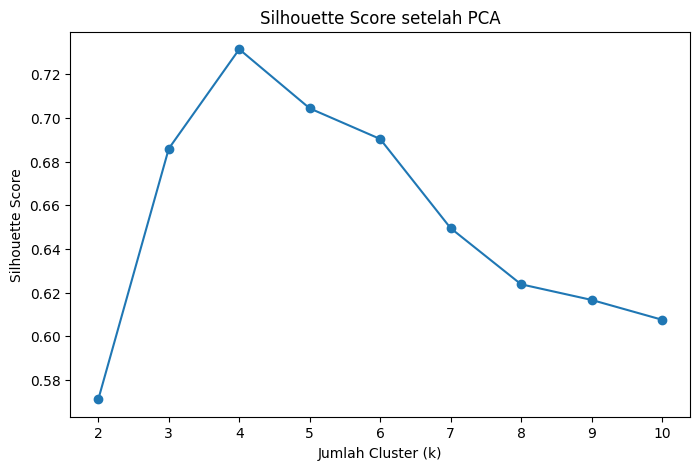

In [1928]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score setelah PCA')
plt.show()

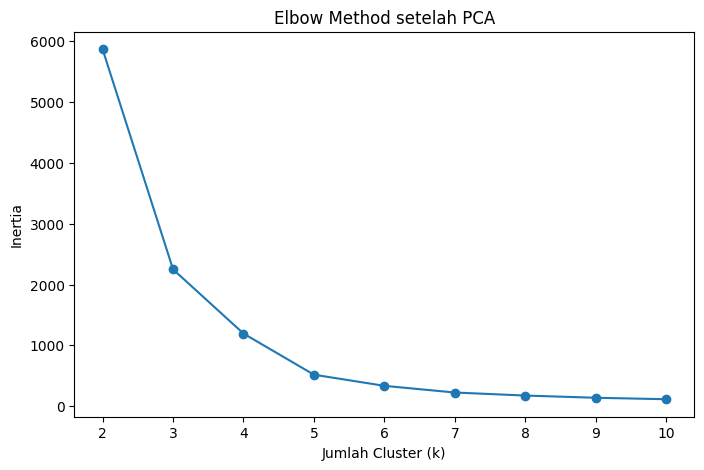

In [1929]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method setelah PCA')
plt.show()

In [1930]:
for k, score in zip(k_values, silhouette_scores):
    print(f'Cluster ke: {k}, Silhouette Score: {score}')

Cluster ke: 2, Silhouette Score: 0.5712161996720049
Cluster ke: 3, Silhouette Score: 0.6859200370734222
Cluster ke: 4, Silhouette Score: 0.7314019445226324
Cluster ke: 5, Silhouette Score: 0.7043395539709117
Cluster ke: 6, Silhouette Score: 0.6903243628948478
Cluster ke: 7, Silhouette Score: 0.6495120306881211
Cluster ke: 8, Silhouette Score: 0.6238178944457995
Cluster ke: 9, Silhouette Score: 0.616670841116242
Cluster ke: 10, Silhouette Score: 0.6076026483845337


Pada cluster ke-4 memiliki silhouette scorre tertinggi yaitu 0.73

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

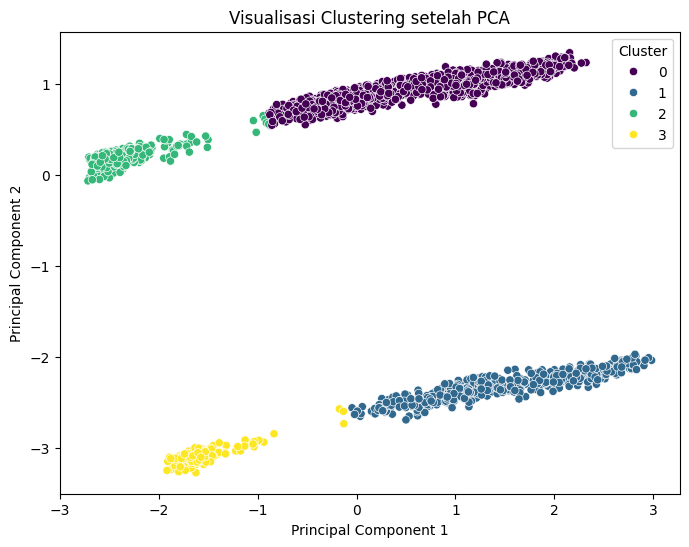

Cluster
0    1418
2     526
1     426
3     142
Name: count, dtype: int64


In [1931]:
k_optimal = 4
kmeans = KMeans(n_clusters=k_optimal, random_state=42, n_init=10)
df_pca['Cluster'] = kmeans.fit_predict(df_pca)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca['PC1'], y=df_pca['PC2'], hue=df_pca['Cluster'], palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Visualisasi Clustering setelah PCA')
plt.show()

print(df_pca['Cluster'].value_counts())

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

Invers data yang telah diencode

In [1932]:
def inverse_occupation(row):
    if row['CustomerOccupation_Engineer']:
        return 'Engineer'
    elif row['CustomerOccupation_Retired']:
        return 'Retired'
    elif row['CustomerOccupation_Student']:
        return 'Student'
    else:
        return 'Doctor'

df['CustomerOccupation'] = df.apply(inverse_occupation, axis=1)
df.drop(columns=['CustomerOccupation_Engineer', 'CustomerOccupation_Retired', 'CustomerOccupation_Student'], inplace=True)

In [1933]:
df['TransactionType'] = df['TransactionType'].map({0: 'Credit', 1: 'Debit'})

In [1934]:
df['Location'] = df_ori['Location']
df.drop(columns=['Location_Freq'], inplace=True)

In [1935]:
df['Channel'] = df.apply(lambda row: 'Branch' if row['Channel_Branch']
                         else 'Online' if row['Channel_Online']
                         else 'ATM', axis=1)

df.drop(columns=['Channel_Branch', 'Channel_Online'], inplace=True)

In [1936]:
df['TransactionDate'] = df_ori['TransactionDate']
df.drop(columns=['TransactionYear', 'TransactionMonth', 'TransactionDay', 'TransactionHour', 'TransactionWeekday'], inplace=True)

In [1937]:
df['PreviousTransactionDate'] = df_ori['PreviousTransactionDate']
df.drop(columns=['DaysSinceLastTransaction'], inplace=True)

Masukan Label ke dataframe

In [1938]:
df['Cluster'] = kmeans.labels_

In [1939]:
df.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerOccupation,Location,Channel,TransactionDate,PreviousTransactionDate,Cluster
0,14.09,Debit,70,81,1,5112.21,Doctor,San Diego,ATM,2023-04-11 16:29:14,2024-11-04 08:08:08,0
1,376.24,Debit,68,141,1,13758.91,Doctor,Houston,ATM,2023-06-27 16:44:19,2024-11-04 08:09:35,0
2,126.29,Debit,19,56,1,1122.35,Student,Mesa,Online,2023-07-10 18:16:08,2024-11-04 08:07:04,2
3,184.50,Debit,26,25,1,8569.06,Student,Raleigh,Online,2023-05-05 16:32:11,2024-11-04 08:09:06,2
4,13.45,Credit,26,198,1,7429.40,Student,Atlanta,Online,2023-10-16 17:51:24,2024-11-04 08:06:39,3


In [1940]:
#Masukan label kedalam dataset ori(awal)
df_ori['Label'] = kmeans.labels_

In [1941]:
df_ori.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Label
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70,Doctor,81,1,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68,Doctor,141,1,13758.91,2024-11-04 08:09:35,0
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19,Student,56,1,1122.35,2024-11-04 08:07:04,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26,Student,25,1,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,26,Student,198,1,7429.40,2024-11-04 08:06:39,3


In [1942]:
df.head()

,TransactionAmount,TransactionType,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerOccupation,Location,Channel,TransactionDate,PreviousTransactionDate,Cluster
0,14.09,Debit,70,81,1,5112.21,Doctor,San Diego,ATM,2023-04-11 16:29:14,2024-11-04 08:08:08,0
1,376.24,Debit,68,141,1,13758.91,Doctor,Houston,ATM,2023-06-27 16:44:19,2024-11-04 08:09:35,0
2,126.29,Debit,19,56,1,1122.35,Student,Mesa,Online,2023-07-10 18:16:08,2024-11-04 08:07:04,2
3,184.50,Debit,26,25,1,8569.06,Student,Raleigh,Online,2023-05-05 16:32:11,2024-11-04 08:09:06,2
4,13.45,Credit,26,198,1,7429.40,Student,Atlanta,Online,2023-10-16 17:51:24,2024-11-04 08:06:39,3


Rata-rata cluster terhadap beberapa fitur

In [1943]:
features = df.select_dtypes(include='number').columns.tolist()
features.remove('Cluster')
cluster_means = df.groupby('Cluster')[features].mean()

cluster_means

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
Cluster,,,,,
0,288.806622,52.090268,120.035966,1.121298,6379.467659
1,297.564930,53.720657,117.190141,1.164319,6474.322042
2,311.663897,23.083650,118.853612,1.112167,1557.838175
3,333.309225,23.450704,126.007042,1.084507,1574.365070


In [1944]:
# Menghitung jumlah TransactionType per Cluster
transaction_type_per_cluster = df.groupby('Cluster')['TransactionType'].value_counts(normalize=True).unstack()
transaction_type_per_cluster_percent = transaction_type_per_cluster * 100
transaction_type_per_cluster_percent = transaction_type_per_cluster_percent.fillna(0)

print(transaction_type_per_cluster_percent)

TransactionType  Credit  Debit
Cluster                       
0                   0.0  100.0
1                 100.0    0.0
2                   0.0  100.0
3                 100.0    0.0


In [1950]:
occupation_per_cluster = df.groupby('Cluster')['CustomerOccupation'].value_counts(normalize=True).unstack()
occupation_per_cluster_percent = occupation_per_cluster * 100
occupation_per_cluster_percent = occupation_per_cluster_percent.fillna(0)

occupation_per_cluster_percent

CustomerOccupation,Doctor,Engineer,Retired,Student
Cluster,,,,
0,34.485190,33.850494,31.664316,0.000000
1,32.629108,32.159624,35.211268,0.000000
2,0.380228,1.140684,0.000000,98.479087
3,0.704225,1.408451,0.000000,97.887324


# Analisis Karakteristik Cluster dari Model KMeans

Berdasarkan hasil clustering menggunakan metode KMeans setelah reduksi dimensi dengan PCA, berikut adalah karakteristik masing-masing cluster yang terbentuk: <br>
<br>
### Cluster 0:
**Transaction Type:** Debit <br>
**Rata-rata Usia Pelanggan:** 52.1 tahun <br>
**Rata-rata Saldo Rekening:** 1,557.66 <br>
**Rata-rata Jumlah Transaksi:** 288.81<br>
**Persentase Pelanggan Berprofesi sebagai Engineer:** 33.850494 % <br>
**Persentase Pelanggan Berprofesi sebagai Retired:** 31.664316 % <br>
**Persentase Pelanggan Berprofesi sebagai Doctor:**  34.485190 % <br>
**Analisis:** Cluster ini didominasi oleh pelanggan dewasa dan pensiunan dengan saldo rekening tinggi. Seluruh transaksi bersifat debit, menunjukkan preferensi mereka untuk menggunakan dana yang tersedia. Mereka mungkin merupakan pelanggan konservatif yang menghindari kredit. <br>
<br>

### Cluster 1:
**Transaction Type:** Credit<br>
**Rata-rata Usia Pelanggan:** 52.06 tahun <br>
**Rata-rata Saldo Rekening:** 6,372.74 <br>
**Rata-rata Jumlah Transaksi:** 297.56<br>
**Persentase Pelanggan Berprofesi sebagai Engineer:** 32.159624 % <br>
**Persentase Pelanggan Berprofesi sebagai Retired:** 35.211268 % <br>
**Persentase Pelanggan Berprofesi sebagai Doctor:** 32.629108 % <br>
**Analisis:**     Sama seperti Cluster 0, kelompok ini terdiri dari pelanggan lebih tua dengan saldo besar, namun cenderung menggunakan kartu kredit dalam transaksi mereka. Ini bisa menunjukkan kepercayaan terhadap sistem kredit atau pengelolaan keuangan yang lebih strategis.<br>
<br>

### Cluster 2:
**Transaction Type:**  Debit<br>
**Rata-rata Usia Pelanggan:** 53.72 tahun <br>
**Rata-rata Saldo Rekening:** 6,474.32 <br>
**Rata-rata Jumlah Transaksi:** 311.66<br>
**Persentase Pelanggan Berprofesi sebagai Engineer:** 1.140684 % <br>
**Persentase Pelanggan Berprofesi sebagai Retired:** 0.380228 % <br>
**Persentase Pelanggan Berprofesi sebagai Student:** 98.479087 % <br>
**Analisis:** Cluster ini terdiri dari mahasiswa muda dengan saldo rendah. Mereka lebih suka menggunakan debit dan tetap melakukan banyak transaksi, mungkin karena terbatasnya akses ke layanan kredit atau keinginan menghindari utang. <br>
<br>


### Cluster 3:
**Transaction Type:** Credit<br>
**Rata-rata Usia Pelanggan:** 23.45 tahun <br>
**Rata-rata Saldo Rekening:** 1,574.37 <br>
**Rata-rata Jumlah Transaksi:** 333.31<br>
**Persentase Pelanggan Berprofesi sebagai Engineer:** 1.408451 % <br>
**Persentase Pelanggan Berprofesi sebagai Doctor:** 0.704225 % <br>
**Persentase Pelanggan Berprofesi sebagai Student:** 98.479087 % <br>
**Analisis:** Sama seperti Cluster 2, cluster ini berisi mahasiswa dengan saldo rendah. Namun, mereka lebih aktif menggunakan kredit, kemungkinan untuk memenuhi kebutuhan yang melebihi kemampuan keuangan jangka pendek mereka. <br>
<br>
## Kesimpulan
*   Cluster 0 - Profesional & Pensiunan dengan Saldo Tinggi & Transaksi Debit<br>
Pelanggan lebih tua dengan saldo tinggi. Menggunakan Debit, tetapi transaksi mereka terkecil dibandingkan cluster lain.
*   Cluster 1 - Profesional & Pensiunan dengan Saldo Tinggi & Transaksi Kredit<br>
Mirip dengan Cluster 0, tetapi menggunakan Kredit lebih sering. Transaksi rata-rata sedikit lebih tinggi.
*   Cluster 2 - Mahasiswa dengan Saldo Rendah & Transaksi Debit<br>
Pelanggan muda dengan saldo kecil. Menggunakan Debit tetapi memiliki transaksi yang lebih besar dibandingkan kelompok profesional.
*   Cluster 3 - Mahasiswa dengan Saldo Rendah & Transaksi Kredit<br>
Hampir sama dengan Cluster 2, tetapi menggunakan Kredit lebih sering.Memiliki jumlah transaksi rata-rata tertinggi, mungkin mengandalkan kredit untuk kebutuhan finansial mereka.



Rekomendasi Bisnis:
#### Cluster 0 -> Profesional & Pensiunan dengan Saldo Tinggi & Transaksi Debit
1.  Produk Investasi Konservatif: Rekomendasikan produk seperti deposito, reksa dana pendapatan tetap.
2. Program loyalitas berbasis saldo: Berikan insentif untuk saldo tinggi dan transaksi debit besar.
3. Edukasi Digital Banking: Perkenalkan pembayaran digital untuk mendorong aktivitas.

#### Cluster 1-> Profesional & Pensiunan dengan Saldo Tinggi & Transaksi Kredit
1.   Kartu Kredit Premium: Tawarkan kartu kredit dengan poin reward atau cashback khusus.
2. Fitur Cicilan & Limit Tinggi: Sesuaikan dengan daya beli dan penghasilan tinggi mereka.
3. Layanan Finansial Khusus: Berikan personal banker atau konsultasi keuangan.

#### Cluster 2-> Mahasiswa dengan Saldo Rendah & Transaksi Debit
1. Tabungan Mahasiswa: Produk tabungan dengan minimal saldo rendah dan fitur edukasi keuangan
2. Promosi E-Wallet & Game: Kerja sama dengan merchant online favorit anak muda.
3. Reward untuk Transaksi Debit: Tingkatkan frekuensi transaksi melalui sistem poin.

#### Cluster 3-> Mahasiswa dengan Saldo Rendah & Transaksi Kredit
1. Kartu Kredit Pelajar: Limit kecil, bunga ringan, dan edukasi penggunaan kredit.
2. Subsidi Pembayaran Pendidikan: Tawarkan program cicilan atau kredit pendidikan.
3. Cashback untuk Belanja Edukasi: Beri insentif untuk penggunaan di merchant pendidikan atau buku.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [1946]:
df.to_csv('Dataset_inisiasi.csv', index=False)

In [1947]:
#Menyimpan library yang digunakan
!pip freeze | grep -E "numpy|pandas|seaborn|matplotlib|scikit-learn" > requirements.txt